In [0]:
#import libraries
import pandas as pd #take a short name pd for subsequent calling aas an object
#import geopandas as gpd #take a short name gpd for subsequent calling as an object
import matplotlib.pyplot as plt
import datetime
import numpy as np
import timeit
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
#from ggplaot import *
import time



In [0]:
#define the variables you want to cluster together
df = pd.read_excel('/Users/adhyadagar/Desktop/Newly computed labels/New_Cluster_Reason_Values.xlsx')
print(df.head())
print(df.shape)
print(df.columns)
print(df.describe())

   State  District    Area Name  \
0      1         1      Kupwara   
1      1         2       Badgam   
2      1         3  Leh(Ladakh)   
3      1         4       Kargil   
4      1         5        Punch   

   Reason for migration Work/employment Persons_t%  Business Persons_t%  \
0                                         2.928903             0.425052   
1                                         1.472224             0.282619   
2                                         9.255984             1.957316   
3                                         5.167772             0.971060   
4                                         3.338878             0.462377   

   Education Persons_t%  Marriage Persons_t%  Moved after birth Persons_t%  \
0              3.031294            50.977018                      3.665431   
1              0.322707            72.292320                      0.895962   
2              4.589671            35.732815                      0.542389   
3              3.869820   

In [0]:
x = df.iloc[:,[18,19]].values
y = df.iloc[:,[0,1,2]].values

In [0]:
print(df.shape)

(640, 21)


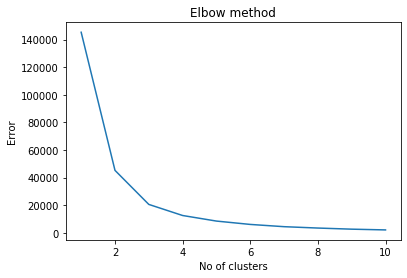

In [0]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7085494716925419
For n_clusters = 3 The average silhouette_score is : 0.5921406440744851
For n_clusters = 4 The average silhouette_score is : 0.5678872692594986
For n_clusters = 5 The average silhouette_score is : 0.556021070863874
For n_clusters = 6 The average silhouette_score is : 0.5557764847494822


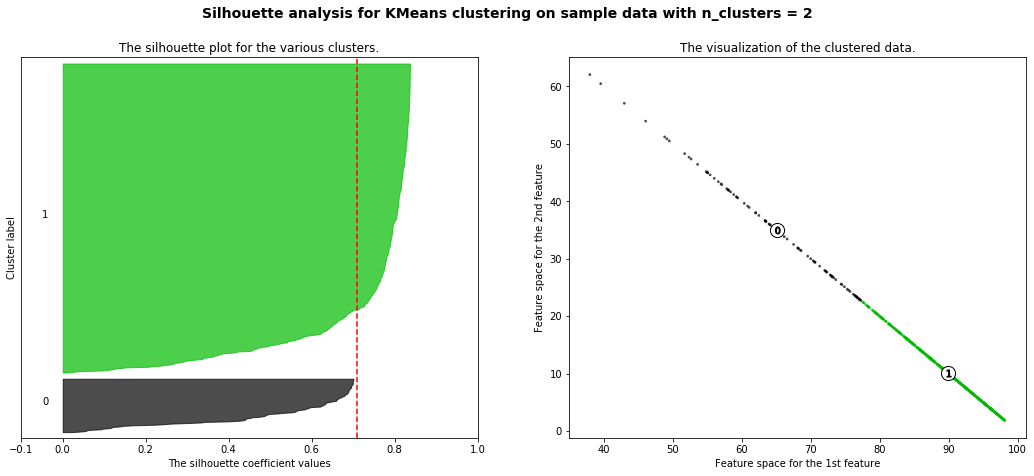

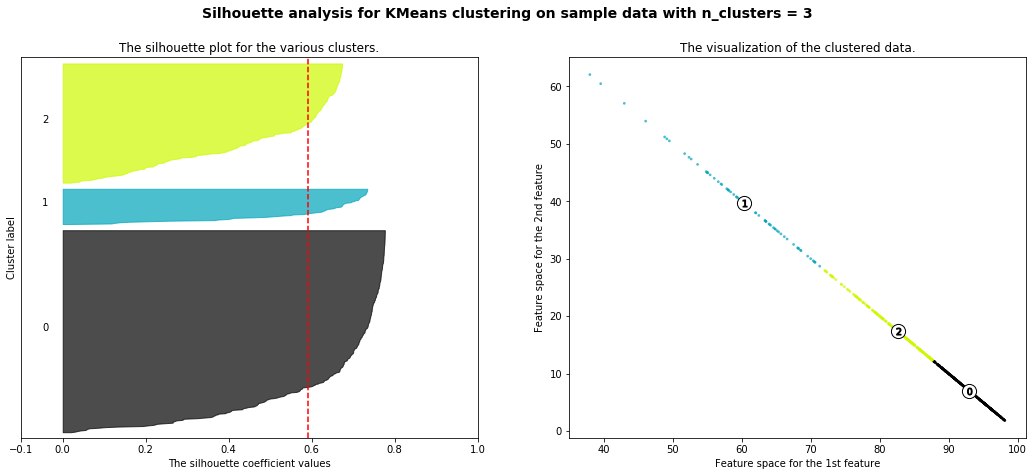

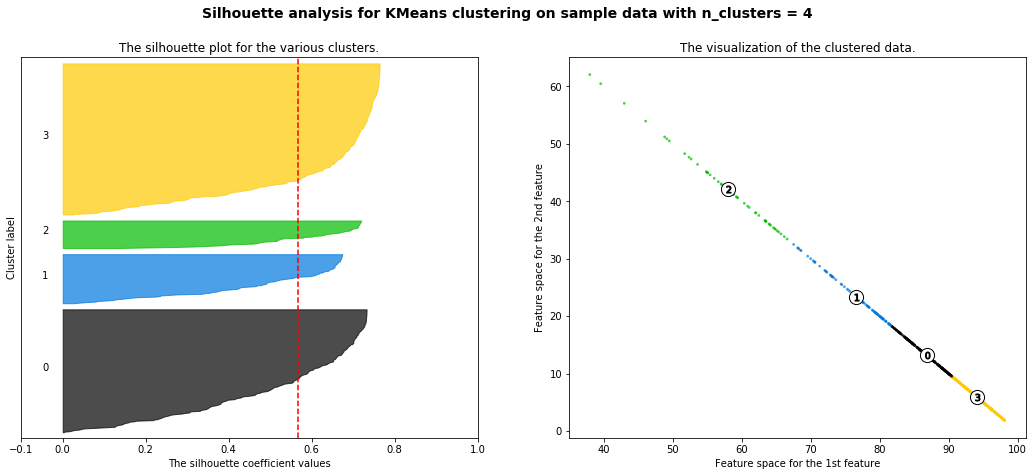

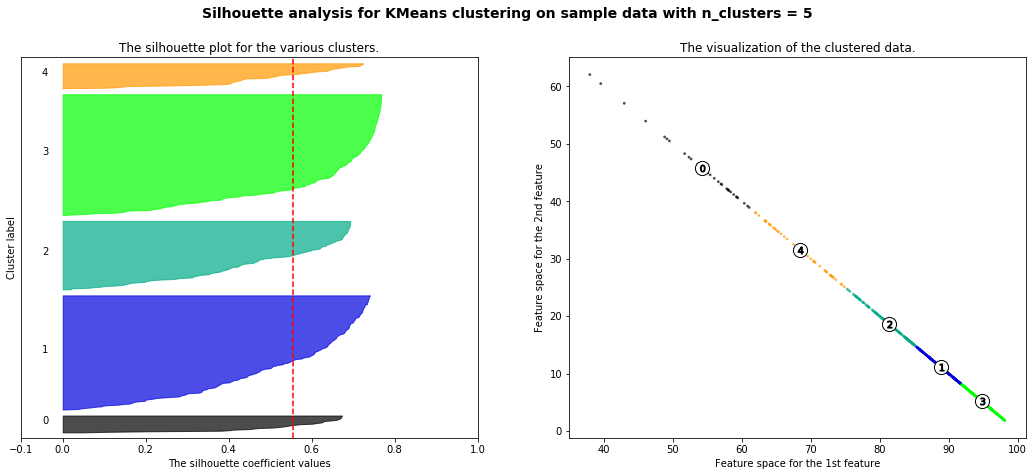

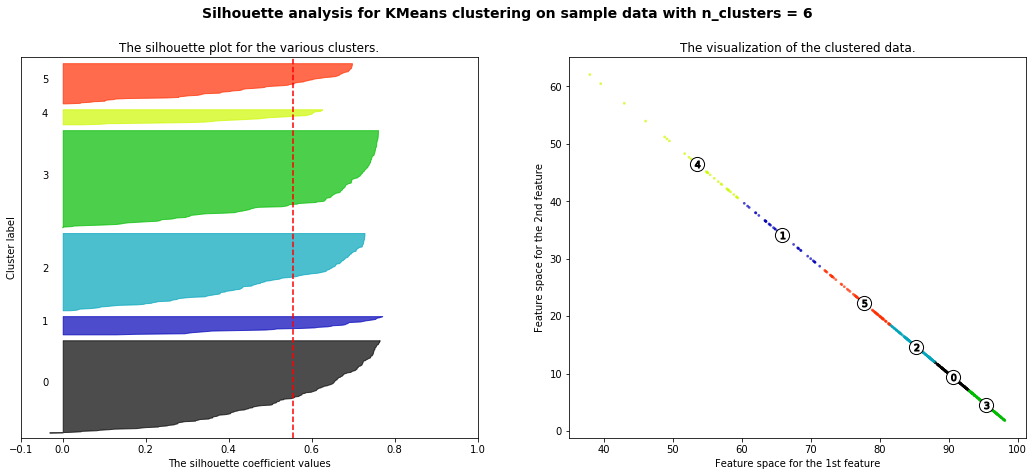

<Figure size 432x288 with 0 Axes>

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
plt.savefig("/Users/adhyadagar/Desktop/District_Reason")

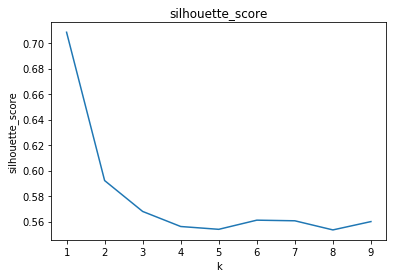

In [0]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

import matplotlib.pyplot as plt
plt.plot(range(1, 10), sil)
plt.title('silhouette_score')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

In [0]:
clustercenter = kmeans.cluster_centers_
#state_codes = {}
dist_codes = {}
dist_details = {}
dist_feature = {}



for i,j in zip(y_kmeans,y):
    if i not in dist_codes:
        #state_codes[i] = [str(j[0])]
        dist_codes[i] = [str(j[2])]
    else:
        #state_codes[i].append(str(j[0]))
        dist_codes[i].append(str(j[2]))
        
for i,j in zip(x,y):
    if str(j[2]) not in dist_feature:
        dist_feature[str(j[2])] = [i]
        #dist_feature[str(j[0])] = [i]
        
    else:
        #dist_feature[str(j[0])].append(i)
        dist_feature[str(j[2])].append(i)
        
for i,j in zip(y_kmeans,y):
    if i not in dist_details:
        #state_codes[i] = [str(j[0])]
        dist_details[i] = [str(i)+ ',' + str(j[0]) + ',' +str(j[1])+ ',' +str(j[2])]
    else:
        #state_codes[i].append(str(j[0]))
        dist_details[i].append(str(i)+ ',' +str(j[0]) +',' +str(j[1])+',' +str(j[2]))
        
print(dist_codes)
print(dist_details)
#print(dist_feature)
#print(state_codes) 

{0: ['Kupwara', 'Badgam', 'Punch', 'Rajouri', 'Kathua', 'Baramula', 'Bandipore', 'Pulwama', 'Shupiyan', 'Anantnag', 'Kulgam', 'Doda', 'Ramban', 'Kishtwar', 'Udhampur', 'Reasi', 'Samba', 'Chamba', 'Kangra', 'Mandi', 'Hamirpur', 'Una', 'Bilaspur', 'Gurdaspur', 'Hoshiarpur', 'Shahid Bhagat Singh Nagar', 'Moga', 'Firozpur', 'Muktsar', 'Faridkot', 'Mansa', 'Tarn Taran', 'Rupnagar', 'Sangrur', 'Barnala', 'Rudraprayag', 'Bageshwar', 'Almora\n', 'Kaithal', 'Jind', 'Fatehabad', 'Bhiwani', 'Jhajjar', 'Mahendragarh', 'Mewat', 'Palwal', 'Bikaner', 'Churu', 'Jhunjhunun', 'Alwar', 'Bharatpur', 'Dhaulpur', 'Karauli', 'Sawai Madhopur', 'Dausa', 'Sikar', 'Nagaur', 'Jodhpur', 'Jaisalmer', 'Barmer', 'Jalor', 'Sirohi', 'Pali', 'Ajmer', 'Tonk', 'Bundi', 'Bhilwara', 'Rajsamand', 'Dungarpur', 'Banswara', 'Chittaurgarh', 'Baran', 'Jhalawar', 'Udaipur', 'Pratapgarh', 'Saharanpur', 'Muzaffarnagar', 'Bijnor', 'Moradabad', 'Rampur', 'Jyotiba Phule Nagar', 'Baghpat', 'Bulandshahr', 'Mahamaya Nagar', 'Mathura', 'Ag

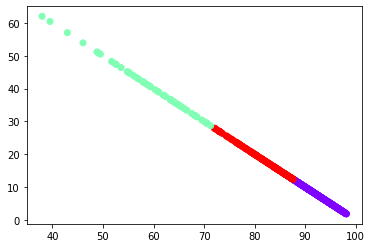

In [0]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans,cmap='rainbow')

In [0]:
## Cluster 0 box plot
district_0 = dist_codes[0]

x_data = []

for i in district_0:
    x_data.append(dist_feature[i])
    
district_1 = dist_codes[1]

x_data1 = []

for i in district_1:
    x_data1.append(dist_feature[i])
    
district_2 = dist_codes[2]

x_data2 = []

for i in district_2:
    x_data2.append(dist_feature[i])

In [0]:
district_0

['Kupwara',
 'Badgam',
 'Punch',
 'Rajouri',
 'Kathua',
 'Baramula',
 'Bandipore',
 'Pulwama',
 'Shupiyan',
 'Anantnag',
 'Kulgam',
 'Doda',
 'Ramban',
 'Kishtwar',
 'Udhampur',
 'Reasi',
 'Samba',
 'Chamba',
 'Kangra',
 'Mandi',
 'Hamirpur',
 'Una',
 'Bilaspur',
 'Gurdaspur',
 'Hoshiarpur',
 'Shahid Bhagat Singh Nagar',
 'Moga',
 'Firozpur',
 'Muktsar',
 'Faridkot',
 'Mansa',
 'Tarn Taran',
 'Rupnagar',
 'Sangrur',
 'Barnala',
 'Rudraprayag',
 'Bageshwar',
 'Almora\n',
 'Kaithal',
 'Jind',
 'Fatehabad',
 'Bhiwani',
 'Jhajjar',
 'Mahendragarh',
 'Mewat',
 'Palwal',
 'Bikaner',
 'Churu',
 'Jhunjhunun',
 'Alwar',
 'Bharatpur',
 'Dhaulpur',
 'Karauli',
 'Sawai Madhopur',
 'Dausa',
 'Sikar',
 'Nagaur',
 'Jodhpur',
 'Jaisalmer',
 'Barmer',
 'Jalor',
 'Sirohi',
 'Pali',
 'Ajmer',
 'Tonk',
 'Bundi',
 'Bhilwara',
 'Rajsamand',
 'Dungarpur',
 'Banswara',
 'Chittaurgarh',
 'Baran',
 'Jhalawar',
 'Udaipur',
 'Pratapgarh',
 'Saharanpur',
 'Muzaffarnagar',
 'Bijnor',
 'Moradabad',
 'Rampur',
 'Jyot

In [0]:
district_1

['Lahul & Spiti',
 'Shimla',
 'Kinnaur',
 'Chandigarh',
 'Gurgaon',
 'North West',
 'North',
 'North East',
 'East',
 'New Delhi',
 'Central',
 'West',
 'South West',
 'South',
 'North  District',
 'East District',
 'Tawang',
 'West Kameng',
 'Papum Pare',
 'West Siang',
 'East Siang',
 'Upper Siang',
 'Changlang',
 'Tirap',
 'Lower Subansiri',
 'Dibang Valley',
 'Lower Dibang Valley',
 'Lohit',
 'Anjaw',
 'Mon',
 'Mokokchung',
 'Zunheboto',
 'Wokha',
 'Dimapur',
 'Phek',
 'Tuensang',
 'Longleng',
 'Kiphire',
 'Kohima',
 'Peren',
 'Ukhrul',
 'Aizawl',
 'Lunglei',
 'Saiha',
 'East Khasi Hills',
 'Dima Hasao',
 'Kamrup Metropolitan',
 'Kolkata',
 'Bhopal',
 'Surat',
 'Daman',
 'Dadra & Nagar Haveli',
 'Thane',
 'Mumbai Suburban',
 'Mumbai',
 'Pune',
 'Hyderabad',
 'Rangareddy',
 'Bangalore',
 'Lakshadweep',
 'Chennai',
 'Tiruppur',
 'Nicobars',
 'South Andaman']

In [0]:
district_2

['Leh(Ladakh)',
 'Kargil',
 'Srinagar',
 'Ganderbal',
 'Jammu',
 'Kullu',
 'Solan',
 'Sirmaur',
 'Kapurthala',
 'Jalandhar',
 'Fatehgarh Sahib',
 'Ludhiana',
 'Bathinda',
 'Patiala',
 'Amritsar',
 'Sahibzada Ajit Singh Nagar',
 'Uttarkashi',
 'Chamoli',
 'Tehri Garhwal',
 'Dehradun',
 'Garhwal',
 'Pithoragarh',
 'Champawat',
 'Nainital',
 'Udham Singh Nagar',
 'Hardwar',
 'Panchkula',
 'Ambala',
 'Yamunanagar',
 'Kurukshetra',
 'Karnal',
 'Panipat',
 'Sonipat',
 'Sirsa',
 'Hisar',
 'Rohtak',
 'Rewari',
 'Faridabad',
 'Ganganagar',
 'Hanumangarh',
 'Jaipur',
 'Kota',
 'Meerut',
 'Ghaziabad',
 'Gautam Buddha Nagar',
 'Aligarh',
 'Lucknow',
 'Kanpur Nagar',
 'Sonbhadra',
 'Patna',
 'West District',
 'South District',
 'East Kameng',
 'Upper Subansiri',
 'Tamenglong',
 'Churachandpur',
 'Mamit',
 'Kolasib',
 'Champhai',
 'Serchhip',
 'Lawngtlai',
 'West Tripura',
 'Dhalai',
 'North Tripura',
 'East Garo Hills',
 'South Garo Hills',
 'Ribhoi',
 'Jaintia Hills',
 'Tinsukia',
 'Dibrugarh',
 '

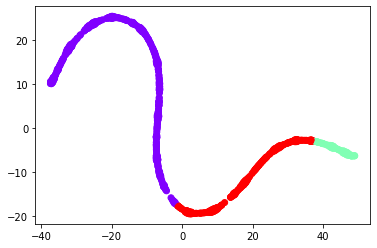

In [0]:
import numpy as np
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(x)
X_embedded.shape
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y_kmeans,cmap='rainbow')

In [0]:
from matplotlib.patches import Polygon

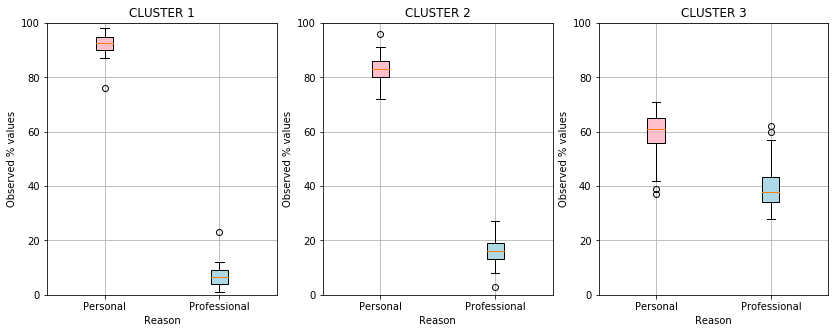

In [0]:

import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
labels = ['Personal','Professional']

########################################## BOX PLOT 0  ##########################################
x_data_0 = [int(i[0][0]) for i in x_data]
x_data_1 = [int(i[0][1]) for i in x_data]


input_0 = [x_data_0,x_data_1]

# rectangular box plot
bplot0 = axes[0].boxplot(input_0,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('CLUSTER 1')

########################################## BOX PLOT 1  ##########################################
x_data_01 = [int(i[0][0]) for i in x_data1]
x_data_11 = [int(i[0][1]) for i in x_data1]


input_1= [x_data_01,x_data_11]

bplot1 = axes[2].boxplot(input_1,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[2].set_title('CLUSTER 3')

########################################## BOX PLOT 2  ##########################################
x_data_02 = [int(i[0][0]) for i in x_data2]
x_data_12 = [int(i[0][1]) for i in x_data2]


input_2 = [x_data_02,x_data_12]

bplot2 = axes[1].boxplot(input_2,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('CLUSTER 2')




# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot0, bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    ax.set_xlabel('Reason')
    ax.set_ylabel('Observed % values')
    ax.set_ylim(0, 100)    

plt.show()



In [0]:
from statistics import mean 

for i in input_0:
    print('Cluster 1')
    print(min(i),max(i),mean(i))
for i in input_2:
    print('Cluster 2')
    print(min(i),max(i),mean(i))
for i in input_1:
    print('Cluster 3')
    print(min(i),max(i),mean(i))



Cluster 1
76 98 92.44475138121547
Cluster 1
1 23 6.55524861878453
Cluster 2
72 96 82.25700934579439
Cluster 2
3 27 16.742990654205606
Cluster 3
37 71 59.78125
Cluster 3
28 62 39.21875


In [0]:
dist_details[0].extend(dist_details[1])
dist_details[0].extend(dist_details[2])

NameError: name 'dist_details' is not defined

In [0]:
dist_details[0]

['0,1,1,Kupwara',
 '0,1,2,Badgam',
 '0,1,5,Punch',
 '0,1,6,Rajouri',
 '0,1,7,Kathua',
 '0,1,8,Baramula',
 '0,1,9,Bandipore',
 '0,1,12,Pulwama',
 '0,1,13,Shupiyan',
 '0,1,14,Anantnag',
 '0,1,15,Kulgam',
 '0,1,16,Doda',
 '0,1,17,Ramban',
 '0,1,18,Kishtwar',
 '0,1,19,Udhampur',
 '0,1,20,Reasi',
 '0,1,22,Samba',
 '0,2,23,Chamba',
 '0,2,24,Kangra',
 '0,2,27,Mandi',
 '0,2,28,Hamirpur',
 '0,2,29,Una',
 '0,2,30,Bilaspur',
 '0,3,35,Gurdaspur',
 '0,3,38,Hoshiarpur',
 '0,3,39,Shahid Bhagat Singh Nagar',
 '0,3,42,Moga',
 '0,3,43,Firozpur',
 '0,3,44,Muktsar',
 '0,3,45,Faridkot',
 '0,3,47,Mansa',
 '0,3,50,Tarn Taran',
 '0,3,51,Rupnagar',
 '0,3,53,Sangrur',
 '0,3,54,Barnala',
 '0,5,58,Rudraprayag',
 '0,5,63,Bageshwar',
 '0,5,64,Almora\n',
 '0,6,73,Kaithal',
 '0,6,77,Jind',
 '0,6,78,Fatehabad',
 '0,6,81,Bhiwani',
 '0,6,83,Jhajjar',
 '0,6,84,Mahendragarh',
 '0,6,87,Mewat',
 '0,6,89,Palwal',
 '0,8,101,Bikaner',
 '0,8,102,Churu',
 '0,8,103,Jhunjhunun',
 '0,8,104,Alwar',
 '0,8,105,Bharatpur',
 '0,8,106,Dh

In [0]:
dist_details[0].extend(dist_details[1])

In [0]:
import random
list = []
for i in dist_details[0]:
    x = i.split(',')
    list.append(x)
list
import csv
with open('New_Cluster_Reason2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in list:
        writer.writerow(i)


